In [1]:
# imports
from pkg_resources import resource_filename
from matplotlib import pyplot as plt
import numpy as np

from frb.galaxies import frbgalaxy
from frb import frb

from astropy.coordinates import SkyCoord
from astropy import units
from astropy.cosmology import Planck15

from frb.galaxies import defs
from frb import utils

## Test for one FRB

In [2]:
frb190611 = frb.FRB.by_name('FRB190611')
HG190611 = frb190611.grab_host()

In [3]:
## Calculate offset

In [4]:
HG190611.coord.separation(frb190611.coord).to('arcsec').value
sep = HG190611.coord.separation(frb190611.coord).to('arcsec').value
sep

2.125146022568732

In [5]:
a = np.sqrt(frb190611.eellipse['a_sys'] ** 2 + frb190611.eellipse['a'] ** 2)
b = np.sqrt(frb190611.eellipse['b_sys'] ** 2 + frb190611.eellipse['b'] ** 2)
sepx = sep+a # Distance in RA from FRB centroid to sigma_RA
sepy = sep+b 

In [6]:
a,b

(0.8062257748298549, 0.7615773105863908)

In [7]:
def gauss_2d(sep,sepx,sepy):
    x = np.random.normal(sep,sepx,100)
    y = np.random.normal(sep,sepy,100)
    return (x,y)

In [8]:
gauss_2d(sep,sepx,sepy)

(array([-6.62125599, -0.55594677,  9.92026239,  0.61836423,  2.54594503,
         2.93064077, -0.06006588,  1.18818203, -1.54032242,  4.33835436,
         1.30869127,  4.54656407, -1.07669623, -0.57088049,  4.94722105,
        -3.82901607,  4.41836284,  2.48944812,  0.01709384,  0.33066967,
         2.16323879,  5.2470631 ,  4.82940504,  2.7454057 ,  3.1267222 ,
         2.39641153,  3.83833941,  9.83101354,  4.6089929 ,  0.57035573,
         2.41451974,  3.06306603,  3.89139845,  2.15889117,  7.01454915,
         1.38981961,  3.33255831,  1.19263614,  1.76317286, -3.1085473 ,
        -0.43545292, -0.50981495,  4.50549353, -4.08990936,  5.00714921,
         3.96723744,  3.01891182,  0.85555526, -0.23652916,  4.32160289,
        -2.66077716,  4.26552174,  2.13136448,  4.72244019, -3.84611368,
        -3.14710562, -0.06279359,  0.75645993,  4.0423896 ,  2.88168818,
        -1.74584639,  2.5410068 ,  3.63438735, -0.27913614,  0.71588453,
         3.30447273,  8.11001009, -3.56534719,  4.9

In [11]:
frb190611coord = frb190611.coord
frb_ra = frb190611coord.ra.value
frb_dec = frb190611coord.dec.value
theta = frb190611.eellipse['theta'] * units.deg
x = np.linspace(frb_ra-a, frb_ra+a, 1000)
y = np.linspace(frb_dec-b, frb_dec+b, 1000)

In [12]:
xx,yy = np.meshgrid(x,y)

In [27]:
sky_mesh = utils.radec_to_coord((xx,yy))
ang_diff = hgcoord.separation(sky_mesh)

In [13]:
in_ellipse = ((xx - frb_ra) * np.cos(theta).value + (yy - frb_dec) * np.sin(theta).value) ** 2 / (
                a ** 2) + ((xx - frb_ra) * np.sin(theta).value - (yy - frb_dec) * np.cos(theta).value) ** 2 / (
                             b ** 2) <= 1

In [14]:
in_ellipse

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [15]:
frb190611coord

<SkyCoord (ICRS): (ra, dec) in deg
    (320.74545833, -79.39758333)>

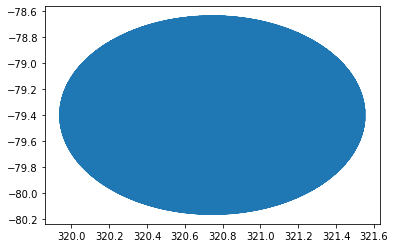

In [16]:
plt.plot(xx[in_ellipse], yy[in_ellipse])

In [29]:
hgcoord = HG190611.coord
hg_ra = hgcoord.ra.value
hg_dec = hgcoord.dec.value

#for i in np.arange(np.shape(xx[in_ellipse])):
x_diff = (hg_ra - xx) * np.cos(hg_dec)
y_diff = hg_dec - yy    

ang_off = np.sqrt(x_diff**2 + y_diff**2)
ang_off,ang_diff



(array([[0.92576154, 0.92516199, 0.92456327, ..., 0.92652303, 0.92712442,
         0.92772663],
        [0.92450712, 0.92390676, 0.92330721, ..., 0.92526963, 0.92587184,
         0.92647487],
        [0.92325351, 0.92265233, 0.92205197, ..., 0.92401706, 0.92462008,
         0.92522392],
        ...,
        [0.92270106, 0.92209952, 0.9214988 , ..., 0.92346506, 0.92406845,
         0.92467265],
        [0.92395431, 0.92335359, 0.92275368, ..., 0.92471728, 0.92531985,
         0.92592323],
        [0.92520837, 0.92460847, 0.92400938, ..., 0.92597031, 0.92657207,
         0.92717464]]),
 <Angle [[0.77512561, 0.77507304, 0.77502057, ..., 0.77519243, 0.77524523,
          0.77529813],
         [0.77362898, 0.7735763 , 0.77352372, ..., 0.77369594, 0.77374885,
          0.77380187],
         [0.77213246, 0.77207967, 0.77202699, ..., 0.77219956, 0.77225258,
          0.77230571],
         ...,
         [0.77347333, 0.77341261, 0.77335201, ..., 0.77355051, 0.7736115 ,
          0.7736726 ],
   

In [18]:
#analytical 2d gaussian
def gauss_2da(x,y, sma, smb):
    
    e_x = np.exp(-(x-frb_ra)**2/(sma/2)**2)
    e_y = np.exp(-(y-frb_dec)**2/(smb/2)**2)

    print(np.shape(e_x))
    w = e_x * e_y
    return w

(1000, 1000)


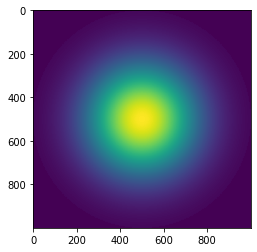

In [21]:
w = gauss_2da(xx, yy, a, b)
w[~in_ellipse] =0
plt.imshow(w)



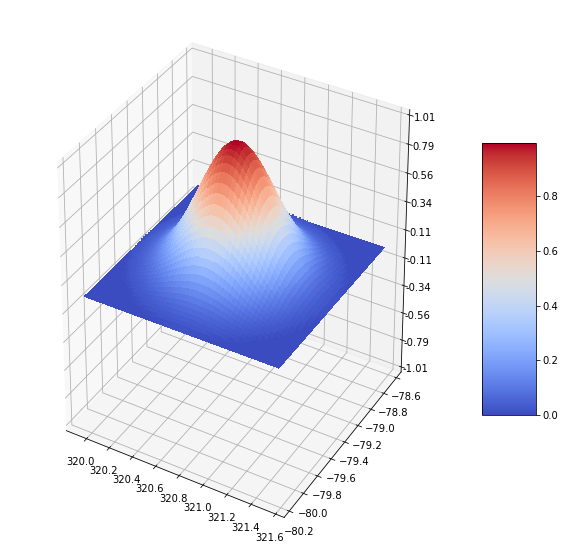

In [22]:
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, w, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [32]:
np.sum(w*ang_diff)/np.sum(w)

<Angle 0.21887614 deg>